In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [11]:
# Load the dataset
df = pd.read_csv("house_rental_data.csv")

# Explore the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living_Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB
None
       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   


In [7]:
# Handle missing values (if any)
df = df.dropna()

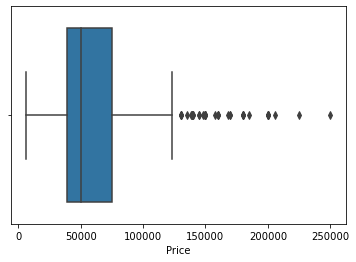

In [8]:
sns.boxplot(x=df['Price'])
plt.show()

In [12]:
df = pd.get_dummies(df, columns=['Living_Room'], drop_first=True)


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     645 non-null    int64  
 1   Sqft           645 non-null    float64
 2   Floor          645 non-null    int64  
 3   TotalFloor     645 non-null    int64  
 4   Bedroom        645 non-null    int64  
 5   Bathroom       645 non-null    int64  
 6   Price          645 non-null    int64  
 7   Living_Room_1  645 non-null    uint8  
 8   Living_Room_2  645 non-null    uint8  
 9   Living_Room_3  645 non-null    uint8  
 10  Living_Room_4  645 non-null    uint8  
dtypes: float64(1), int64(6), uint8(4)
memory usage: 37.9 KB
None


In [14]:
scaler = StandardScaler()
numerical_features = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Bathroom']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [15]:
# Check the final structure of the DataFrame
print(df.head())

   Unnamed: 0      Sqft     Floor  TotalFloor   Bedroom  Bathroom  Price  \
0           1 -0.456393 -1.014897   -0.772347 -0.828956  0.276918  62000   
1           2  0.791798 -0.242042   -0.772347  1.151328  0.276918  78000   
2           3 -0.507434 -0.242042   -0.772347 -0.828956 -1.187117  58000   
3           4 -0.089824 -1.014897   -0.772347  0.161186  0.276918  45000   
4           5 -0.730160  1.303669    0.629803  0.161186  0.276918  45000   

   Living_Room_1  Living_Room_2  Living_Room_3  Living_Room_4  
0              0              1              0              0  
1              0              1              0              0  
2              0              1              0              0  
3              0              1              0              0  
4              0              1              0              0  


In [16]:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluate the model
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 402478148.32
Mean Absolute Error: 13434.55
R-squared: 0.72


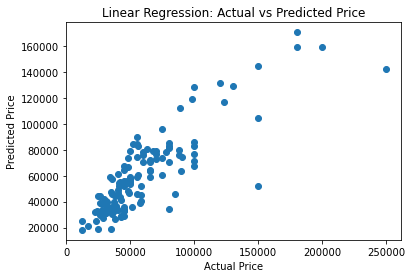

In [21]:
# Visualize predictions against actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Price")
plt.show()